In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import scale
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split

url = "https://github.com/laurent0001/tsv/raw/master/CDOM.gradient.mat.tsv"
#url_sites = "https://github.com/laurent0001/tsv/raw/master/CDOM.sites.mat.tsv"
url_mesh = "https://github.com/laurent0001/tsv/raw/master/Bray_distances_by_CDOM_gradient_meshgrid.tsv"
url_CDOM_diag_mesh = "https://github.com/laurent0001/tsv/blob/master/CDOM.diag.mesh.tsv?raw=true"
url_CDOM_sorted = "https://github.com/laurent0001/tsv/raw/master/CDOM.tsv"
CDOM = pd.read_csv(url, sep="\t") #BCC pairwise distances with CDOM values for both sites for each row
#CDOM_sites = pd.read_csv(url_sites, sep="\t") #Sites matching the order of BCC pairwise distances with CDOM values of both sites for each row
CDOM.mesh = pd.read_csv(url_mesh, sep="\t")
CDOM_diag_mesh = pd.read_csv(url_CDOM_diag_mesh, sep="\t")
CDOM_sorted = pd.read_csv(url_CDOM_sorted, sep="\t")

CDOM_diag_mesh.columns = ["CDOM.x1", "CDOM.x2", "CDOM.mid"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


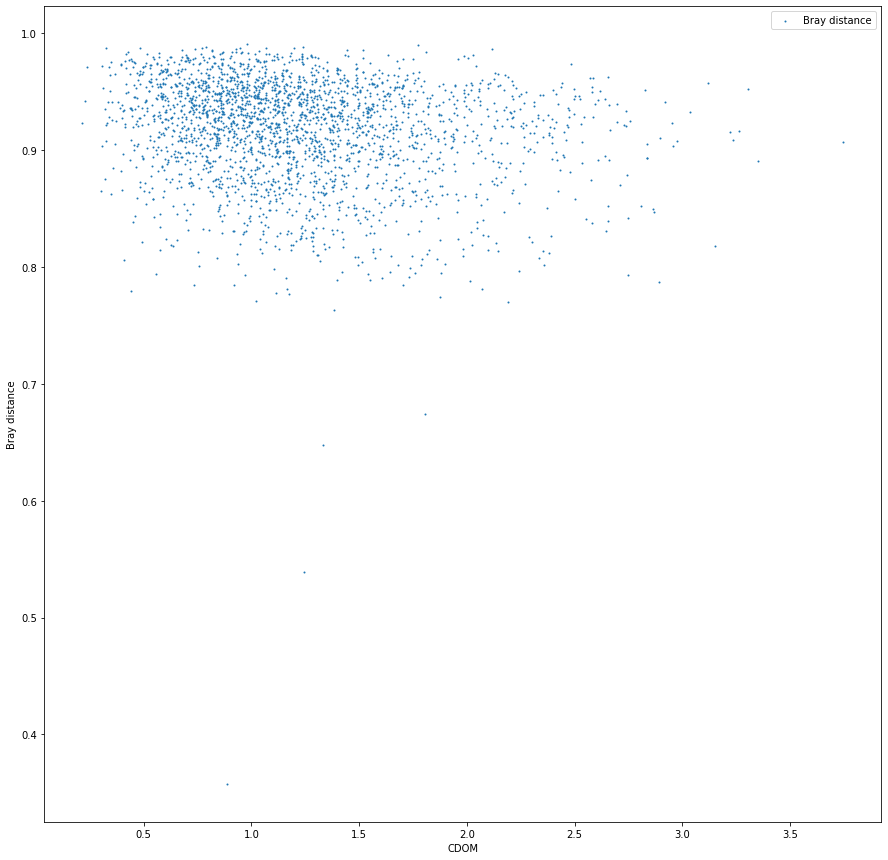

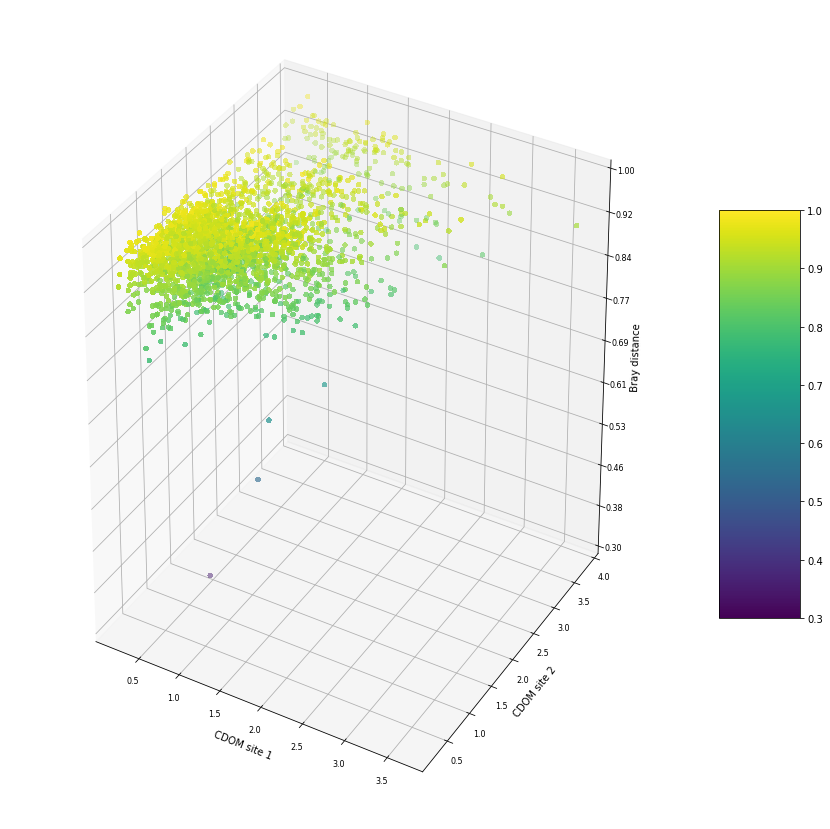

In [0]:
#print(pd.DataFrame(CDOM))
#print(pd.DataFrame(CDOM.mesh))
#print(CDOM.loc[:,"ASV.dist"])

# Plot Bray distance by CDOM middle value
plt.figure(figsize=(15,15))
#plt.scatter(CDOM.loc[:,2], CDOM.loc[:,3], 'r--', label = 'Accuracy')
plt.scatter(CDOM.loc[:,"CDOM.mid"], CDOM.loc[:,"ASV.dist"], label = 'Bray distance', s=1)
plt.ylabel("Bray distance")
plt.xlabel("CDOM")
plt.legend()   
plt.show()

#f.savefig("Bray_distance_by_CDOM.pdf", bbox_inches='tight')

# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan
#x[~np.isnan(x).any(axis=1)] #For subsetting array rows without nans
#print(pd.DataFrame(CDOM.mesh))

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
"""# For surface
ax = fig.gca(projection="3d")
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)
"""
surf = ax.scatter(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        c=CDOM.loc[:,"ASV.dist"], cmap='viridis',linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1)
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


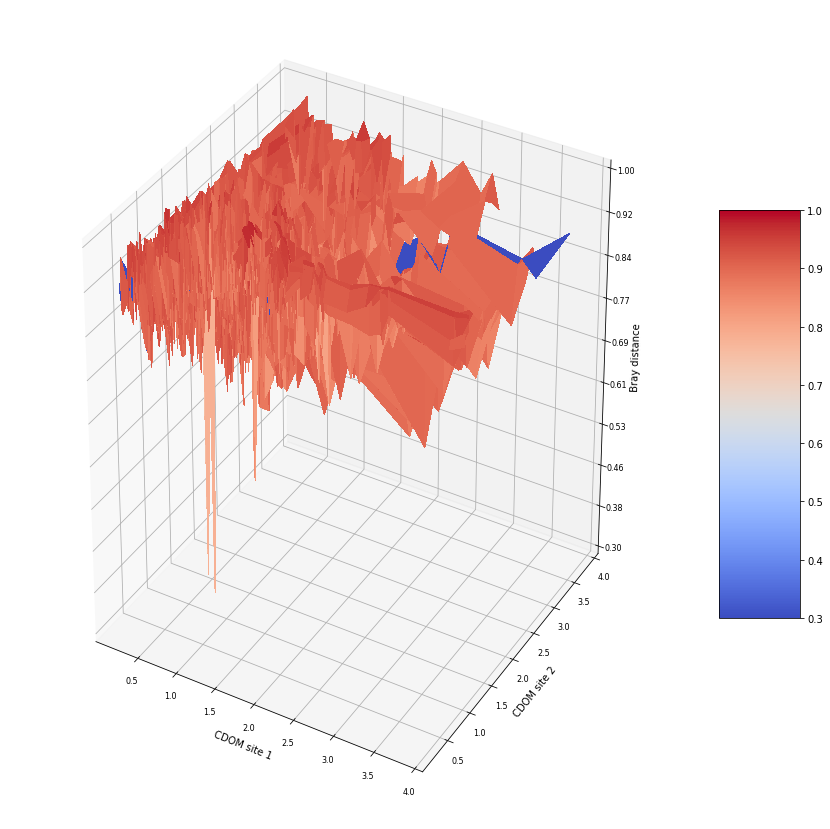

In [0]:
# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan
#print(pd.DataFrame(CDOM.mesh))

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
# For surface
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

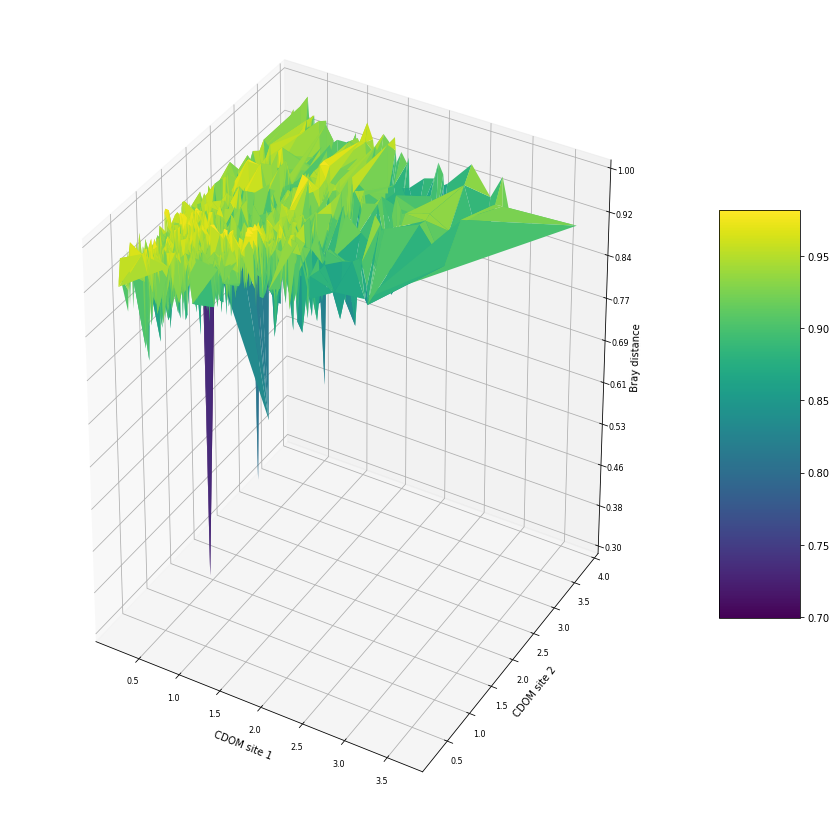

In [2]:
#print(CDOM.loc[:,"CDOM.x1"])
# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
#print(pd.DataFrame(x1), pd.DataFrame(x2))
CDOM.mesh[x1-x2==0] = np.nan

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
"""# For surface
ax = fig.gca(projection="3d")
surf = ax.plot_surface(x1, x2, CDOM.mesh, cmap=cm.coolwarm,linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1, rstride=1, cstride=1)

surf = ax.scatter(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        c=CDOM.loc[:,"ASV.dist"], cmap='viridis',linewidth=0, 
                        antialiased=False, vmin=0.3, vmax=1)
                        """
surf = ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
#plt.savefig("Bray_distance_by_CDOM(surface).pdf", bbox_inches='tight')

In [0]:
class NeuralNetworkML:  #Multiple hidden layers
    def __init__(
            self,
            X_data,
            Y_data,
            trainingShare=0.5,
            n_hidden_layers=2,
            n_hidden_neurons=[24,12],
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0,
            fixed_LR=False,
            method="classification",
            activation="sigmoid"):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.trainingShare = trainingShare
        self.method = method
        self.split_data = self.SplitData(self.X_data_full, self.Y_data_full, self.trainingShare)
        if self.method=="classification":
          self.XTrain = self.split_data[0].toarray()
          self.XTest = self.split_data[1].toarray()
        else:
          self.XTrain = self.split_data[0]
          self.XTest = self.split_data[1]
        self.yTrain = self.split_data[2]
        self.yTest = self.split_data[3]

        self.n_inputs = self.XTrain.shape[0]
        self.n_features = self.XTrain.shape[1]
        self.n_hidden_layers = n_hidden_layers
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.eta = eta
        self.lmbd = lmbd
        self.fixed_LR = fixed_LR
        self.activation = activation

        self.create_biases_and_weights()
        self.accuracy_list = []
        self.cost_list = []
        self.models = []
        self.current_epoch = 0
        self.w_dict = {}

    def create_biases_and_weights(self):
        for n in range(self.n_hidden_layers):
          exec("self.n_hidden_neurons_" + str(eval("n + 1")) + "=" + str(eval("self.n_hidden_neurons[n]")))
        for n in range(self.n_hidden_layers):
          if n==0:
            exec("self.hidden_weights_1 = np.random.randn(self.n_features, self.n_hidden_neurons_1)")
            exec("self.hidden_bias_1 = np.zeros((1, self.n_hidden_neurons_1)) + 0.01")
          else:
            exec("self.hidden_weights_" + str(eval("n + 1")) + "= np.random.randn(self.n_hidden_neurons_" + str(eval("n")) + ", self.n_hidden_neurons_" + str(eval("n+1")) + ")")
            exec("self.hidden_bias_" + str(eval("n + 1")) + "= np.zeros((1, self.n_hidden_neurons_" + str(eval("n + 1")) + ")) + 0.01")
          exec("self.output_weights = np.random.randn(self.n_hidden_neurons_" + str(eval("self.n_hidden_layers")) + ", self.n_categories)")
          exec("self.output_bias = np.zeros((1, self.n_categories)) + 0.01")

    def act(self, x):
      if self.activation=="sigmoid":
        return self.SigmoidFunction(x)
      elif self.activation=="ELU":
        return self.ELU(x, alpha=0.01)
      elif self.activation=="LeakyReLU":
        return self.LeakyReLU(x, alpha=0.01)

    def feed_forward(self):
        for n in range(self.n_hidden_layers):
          if n==0:
            self.z_h_1 = np.matmul(self.XTrain_batch, self.hidden_weights_1) + self.hidden_bias_1
            self.a_h_1 = self.act(self.z_h_1)
          else:
            exec("self.z_h_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ", self.hidden_weights_" + str(eval("n + 1")) + ") + self.hidden_bias_" + str(eval("n + 1")))
            exec("self.a_h_" + str(eval("n + 1")) + " = self.act(self.z_h_" + str(eval("n + 1")) + ")")
        exec("self.z_o = np.matmul(self.a_h_" + str(eval("self.n_hidden_layers")) + ", self.output_weights) + self.output_bias")
        self.probabilities = self.LogRegPredict(self.z_o)
        self.a_o = self.act(self.z_o)
      
    def feed_forward_out(self, X):
        for n in range(self.n_hidden_layers):
          if n==0:
            z_h_1 = np.matmul(X, self.hidden_weights_1) + self.hidden_bias_1
            a_h_1 = self.act(z_h_1)
          # feed-forward for output
          else:
            exec("z_h_" + str(eval("n + 1")) + " = np.matmul(a_h_" + str(eval("n")) + ", self.hidden_weights_" + str(eval("n + 1")) + ") + self.hidden_bias_" + str(eval("n + 1")))
            exec("a_h_" + str(eval("n + 1")) + " = self.act(z_h_" + str(eval("n + 1")) + ")")
        z_o=eval("np.matmul(a_h_" + str(eval("self.n_hidden_layers")) + ", self.output_weights) + self.output_bias")
        a_o = self.act(z_o)
        if self.method=="classification":
          probabilities = self.LogRegPredict(z_o)
        elif self.method=="regression":
          yPred = z_o
          probabilities = z_o
        return probabilities
          
    def LogRegPredict(self, z_o):
      yPred = self.SigmoidFunction(z_o)
      for i in range(0, yPred.shape[0], 1):
        if yPred[i] <= 0.5:
          yPred[i] = 0
        else:
          yPred[i] = 1
      return yPred

    def backpropagation(self):
      w_list = [self.hidden_weights_1, self.hidden_bias_1]
      for n in range(self.n_hidden_layers - 1, -1, -1):
        if n + 1 == self.n_hidden_layers:
          if self.method=="regression":
            error_output = (self.a_o - self.yTrain_batch) #Cost function: derivative of mean squared error
          else:
            error_output = (self.a_o - self.yTrain_batch) * self.a_o * (1 - self.a_o) #Cost function: derivative of cross-entropy
          if self.n_hidden_layers==1:
            self.error_hidden_1 = np.matmul(error_output, self.output_weights.T) * self.a_h_1 * (1 - self.a_h_1)
            self.output_weights_gradient = np.matmul(self.a_h_1.T, error_output)
            self.output_bias_gradient = np.sum(error_output, axis=0)
            self.hidden_weights_gradient_1 = np.matmul(self.XTrain_batch.T, self.error_hidden_1)
            self.hidden_bias_gradient_1 = np.sum(self.error_hidden_1, axis=0)
          else:
            exec("self.error_hidden_" + str(eval("self.n_hidden_layers")) + " = np.matmul(error_output, self.output_weights.T) * self.a_h_" + str(eval("self.n_hidden_layers")) + " * (1 - self.a_h_" + str(eval("self.n_hidden_layers")) + ")")
            exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ".T, self.error_hidden_" + str(eval("n + 1")) + ")")
            exec("self.hidden_bias_gradient_" + str(eval("n + 1")) + " = np.sum(self.error_hidden_" + str(eval("n + 1")) + ", axis=0)")
            exec("self.output_weights_gradient = np.matmul(self.a_h_" + str(eval("n + 1")) + ".T, error_output)")
          self.output_bias_gradient = np.sum(error_output, axis=0)
        elif n > 0:
          exec("self.error_hidden_" + str(eval("n+1")) + " = np.matmul(self.error_hidden_" + str(eval("n + 2")) + ", self.hidden_weights_" + str(eval("n + 2")) + ".T) * self.a_h_" + str(eval("n+1")) + " * (1 - self.a_h_" + str(eval("n+1")) + ")")
          exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " = np.matmul(self.a_h_" + str(eval("n")) + ".T, self.error_hidden_" + str(eval("n + 1")) + ")")
          exec("self.hidden_bias_gradient_" + str(eval("n + 1")) + " = np.sum(self.error_hidden_" + str(eval("n + 1")) + ", axis=0)")
        else:
          if self.n_hidden_layers == 1:
            self.error_hidden_1 = np.matmul(error_output, self.output_weights.T) * self.a_h_1 * (1 - self.a_h_1)
          else:
            self.error_hidden_1 = np.matmul(self.error_hidden_2, self.hidden_weights_2.T) * self.a_h_1 * (1 - self.a_h_1)
            self.hidden_weights_gradient_1 = np.matmul(self.XTrain_batch.T, self.error_hidden_1)
            self.hidden_bias_gradient_1 = np.sum(self.error_hidden_1, axis=0)
        
      if self.lmbd > 0.0:
        self.output_weights_gradient += self.lmbd * self.output_weights
        for n in range(self.n_hidden_layers - 1, -1, -1):
          exec("self.hidden_weights_gradient_" + str(eval("n + 1")) + " += self.lmbd * self.hidden_weights_" + str(eval("n + 1")))
 
      self.output_weights -= self.eta * self.output_weights_gradient/self.batch_size
      self.output_bias -= self.eta * self.output_bias_gradient/self.batch_size

      for n in range(self.n_hidden_layers - 1, -1, -1):
        exec("self.hidden_weights_" + str(eval("n + 1")) + " -= self.eta * self.hidden_weights_gradient_" + str(eval("n + 1")) + "/self.batch_size")
        exec("self.hidden_bias_" + str(eval("n + 1")) + " -= self.eta * self.hidden_bias_gradient_" + str(eval("n + 1")) + "/self.batch_size")

        w_list.append(eval("self.hidden_weights_" + str(eval("n + 1"))))
        w_list.append(eval("self.hidden_bias_" + str(eval("n + 1"))))
      
      w_list.append(self.output_weights)
      w_list.append(self.output_bias)
      self.w_dict[self.current_epoch] = w_list
    
    def RescaleOutputToOriginal(self, z_old, z_new): #z_old is the vector of predicted values to rescale to the original scale of response values (z_new)
        max_old = max(z_old)
        min_old = min(z_old)
        max_new = max(z_new)
        min_new = min(z_new)
        z_rescaled = z_old.copy()
        for i in range(len(z_old)):
          z_rescaled[i] = (max_new - min_new)/(max_old - min_old) * (z_old[i] - max_old) + max_new  
        #value_new = (max_new - min_new)/(max_old - min_old) * (value_old - max_old) + max_new
        return z_rescaled
    
    def model_prediction(self, X, iter):
        m_w = self.w_dict[iter-1] #Model weights
        m_o_w = m_w[-2] #Model output weights
        m_o_b = m_w[-1] #Model output bias
        m_h_w_1 = m_w[0] #Model hidden weights 1
        m_h_b_1 = m_w[1] #Model hidden bias 1
        if self.n_hidden_layers > 1:
          m_h_w_n = m_w[-4:0:-2]#[-1::-1] #Model hidden weights n
          m_h_b_n = m_w[-3:1:-2]#[-1::-1] #Model hidden bias n
          for i in range(self.n_hidden_layers-1):
            exec("m_h_w_" + str(eval("i + 2")) + " = m_h_w_n[i+1]")
            exec("m_h_b_" + str(eval("i + 2")) + " = m_h_b_n[i+1]")

        for n in range(self.n_hidden_layers):
          if n==0:
            m_z_h_1 = np.matmul(X, m_h_w_1) + m_h_b_1
            m_a_h_1 = self.act(m_z_h_1)
          # feed-forward for output
          else:
            exec("m_z_h_" + str(eval("n + 1")) + " = np.matmul(m_a_h_" + str(eval("n")) + ", m_h_w_" + str(eval("n + 1")) + ") + m_h_b_" + str(eval("n + 1")))
            exec("m_a_h_" + str(eval("n + 1")) + " = self.act(m_z_h_" + str(eval("n + 1")) + ")")
        m_z_o=eval("np.matmul(m_a_h_" + str(eval("self.n_hidden_layers")) + ", self.output_weights) + self.output_bias")
        m_a_o = self.act(m_z_o)
        if self.method=="classification":
          probabilities = self.LogRegPredict(m_z_o)
        elif self.method=="regression":
          yPred = self.RescaleOutputToOriginal(m_z_o, self.Y_data_full)
          probabilities = self.RescaleOutputToOriginal(m_z_o, self.Y_data_full)
        return probabilities

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        #return np.argmax(probabilities, axis=1)
        return probabilities

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        t0, t1 = 5, 500
        self.accuracy_list.append(self.accuracy(self.yTest, self.predict(self.XTest)))
        for i in range(self.epochs):
            self.current_epoch = i
            self.shuffled_data = self.shuffle(self.XTrain, self.yTrain) # Rows for XTrain, yTrain are shuffled for each epoch.
            self.XTrain_shuffled = self.shuffled_data[0]
            self.yTrain_shuffled = self.shuffled_data[1]
            for batch in range(int(self.XTrain.shape[0]/self.batch_size)):
                self.XTrain_batch = self.XTrain_shuffled[self.batch_size * batch: self.batch_size * (batch + 1), :] #Minibatch training data
                self.yTrain_batch = self.yTrain_shuffled[self.batch_size * batch: self.batch_size * (batch + 1)] #Minibatch training data
                
                if self.fixed_LR==False:
                  t = i*int(self.XTrain.shape[0]/self.batch_size) + batch #Variable learning rate
                  self.eta = self.step_length(t, t0, t1) #Variable learning rate
                #print(self.eta)
                
                self.feed_forward()
                self.backpropagation()
            self.accuracy_list.append(self.accuracy(self.yTest, self.predict(self.XTest)))
            print("Epoch " + str(i + 1) + " completed")
            
    def shuffle(self, XTrain, yTrain):
      random.seed(1)
      n_rows = list(range(0, XTrain.shape[0], 1))
      random.shuffle(n_rows)
      XTrain_post_shuffle = XTrain[n_rows,:]
      yTrain_post_shuffle = yTrain[n_rows]
      return XTrain_post_shuffle, yTrain_post_shuffle

    def step_length(self,t,t0,t1):
      return t0/(t+t1)

    def SplitData(self, X, y, trainingShare=0.5):
      seed  = 1
      if isinstance(X, pd.DataFrame):
        X = X.values
      if isinstance(y, pd.DataFrame):
        y = y.values
      XTrain, XTest, yTrain, yTest = train_test_split(X, y, train_size=trainingShare, \
                                              test_size = 1-trainingShare,
                                             random_state=seed)
      return XTrain, XTest, yTrain, yTest

    def accuracy(self, yTest, yPred):
      if self.method=="classification":
        return  (yTest.flatten() == yPred.flatten()).sum()/len(yTest.flatten())
      if self.method=="regression":
        self.models.append(self.predict(self.X_data_full))
        return np.mean((self.yTest - self.predict(self.XTest))**2)
    
    def SigmoidFunction(self, x):
      sigma_fn = np.vectorize(lambda x: 1/(1+np.exp(-x)))
      return 1/(1+np.exp(-x))

    def LogRegPredict(self, z_o):
      yPred = self.SigmoidFunction(z_o)
      for i in range(0, yPred.shape[0], 1):
        if yPred[i] <= 0.5:
          yPred[i] = 0
        else:
          yPred[i] = 1
      return yPred

    def ELU(self, x, alpha=0.01):
      ao = x
      for i in range(0, x.shape[0], 1):
        for j in range(0, x.shape[1], 1):
          if x[i,j] < 0:
            ao[i,j] = alpha*(np.exp(x[i,j]) - 1)
      return ao

    def LeakyReLU(self, x, alpha=0.01):
      ao = x
      for i in range(0, x.shape[0], 1):
        for j in range(0, x.shape[1], 1):
          if x[i,j] <= 0:
            ao[i,j] = alpha*x[i,j]
      return ao

In [0]:
# Load bacterial community data
url_ASV = "https://github.com/laurent0001/Project-3/blob/master/ASV_table.tsv?raw=true"
url_ASV_ranged = "https://github.com/laurent0001/Project-3/blob/master/ASV_table_ranged.tsv?raw=true"
url_metadata = "https://github.com/laurent0001/Project-3/raw/master/Metadata_table.tsv?raw=true"
url_metadata_scaled = "https://github.com/laurent0001/Project-3/raw/master/Metadata_table_scaled.tsv?raw=true"
ASV = pd.read_csv(url_ASV, sep="\t")
ASV_ranged = pd.read_csv(url_ASV_ranged, sep="\t")
metadata = pd.read_csv(url_metadata, sep="\t")
metadata_scaled = pd.read_csv(url_metadata_scaled, sep="\t")

[79.6038229968944, 69.12729774207006, 60.114251731735884, 52.462864491776344, 46.096761983485415, 40.88905003469063, 36.623700004988336, 33.12136570826233, 30.238702975014608, 27.829145976412157, 25.781718413972115, 24.03240544798514, 22.523557848150116, 21.20460448299766, 20.039122614012136, 19.00079420993431, 18.06891647149366, 17.22718537546341, 16.46290488675098, 15.766129915143994, 15.12911651551221, 14.546597339309093, 14.017666582751518, 13.545631687726798, 13.129108596022878, 12.762896354971307, 12.443136048141001, 12.167636275115582, 11.935155815675008, 11.74502356908386, 11.59737430070445]
Minimum MSE : 11.59737430070445 reached at epoch  30


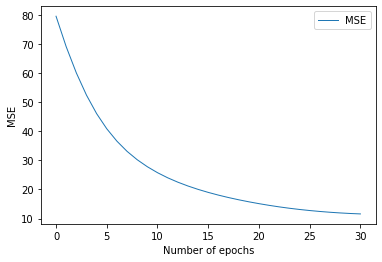

In [0]:
# Neural network with multiple layers - regression - bacterial community data
X_ASV = ASV_ranged
X_ASV.columns = [''] * len(X_ASV.columns)
X_ASV = X_ASV.to_numpy()
y_CDOM = metadata.iloc[:, 27][:, np.newaxis]

NN = NeuralNetworkML(X_ASV, y_CDOM, trainingShare=0.80, n_hidden_layers=5, n_hidden_neurons=[2000, 1000, 500, 250, 125], n_categories=1,
                     epochs=30, batch_size=10, eta=1e-3, lmbd=0, fixed_LR=True, method="regression", activation="sigmoid")
NN.train()
test_predict = NN.predict(NN.XTest)
best_prediction = NN.models[NN.accuracy_list.index(min(NN.accuracy_list))]
print(NN.accuracy_list)
print("Minimum MSE :", min(NN.accuracy_list), "reached at epoch ", NN.accuracy_list.index(min(NN.accuracy_list)))

plt.figure()
plt.plot(list(range(0, len(NN.accuracy_list), 1)), NN.accuracy_list, '-', label = 'MSE', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()   
plt.show()

#skplt.metrics.plot_confusion_matrix(NN.yTest.ravel(), test_predict, normalize=True)

In [0]:
#Compare neural network prediction to true values
best_prediction = NN.models[NN.accuracy_list.index(min(NN.accuracy_list))]
print(np.concatenate((NN.Y_data_full, best_prediction), axis=1))

[[ 0.58        0.66479262]
 [ 0.77        2.77148452]
 [ 1.          4.63668065]
 [ 1.          8.37954671]
 [ 1.13        3.31609307]
 [ 0.93        4.64126561]
 [ 0.96        6.45778448]
 [ 1.63        7.59423486]
 [ 2.78        9.08677198]
 [ 0.74        4.12605331]
 [ 2.12        2.38397609]
 [ 2.41       10.23520757]
 [ 0.69        1.90666986]
 [ 1.84        6.31869035]
 [ 2.87       14.55444906]
 [ 0.63        1.36657521]
 [ 0.21        2.28009966]
 [ 1.56        7.65946955]
 [ 0.76        2.05121174]
 [ 0.39       -0.02562846]
 [ 1.1         6.64800328]
 [ 1.84        3.88791554]
 [ 1.14        3.49260423]
 [ 3.83        9.63002482]
 [ 0.49        3.10776125]
 [ 1.96        1.42106757]
 [ 1.41       -1.06933952]
 [ 1.5         4.02819577]
 [ 1.65        9.57416735]
 [ 1.49       12.01214624]
 [ 0.72        2.26843048]
 [ 1.56       -2.3667035 ]
 [ 0.92        3.31705028]
 [ 1.12        0.28206744]
 [ 1.65        8.68062827]
 [ 1.34       -0.36065979]
 [ 1.01        3.73995477]
 

In [0]:
"""Make data for Franke function"""
np.random.seed(1)

def FrankeFunction(x,y):
  term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
  term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
  term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
  term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
  return term1 + term2 + term3 + term4

def f_noise_franke(x, y):
  shape_z = np.shape(FrankeFunction(x,y))
  noise_z = 0.1*np.random.randn(shape_z[0], shape_z[1])
  return noise_z

def FrankeFunctionData(plot=False):
  x = np.arange(0, 1, 0.005)
  y = np.arange(0, 1, 0.005)
  x, y = np.meshgrid(x,y)
  z = FrankeFunction(x, y) + f_noise_franke(x, y)
  z_no_noise = FrankeFunction(x, y)
  
  if plot==True:
    # Plot the surface.
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.subplots_adjust(left=0, bottom=0, right=2.5, top=2.5, wspace=0, hspace=0)
    ax.view_init(elev=30.0, azim=300.0)
    #ax = fig.gca(projection="3d")
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,linewidth=0, 
                          antialiased=False)
    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    ax.tick_params(labelsize=8)

    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.view_init(elev=30.0, azim=300.0)

    # Plot the surface.
    ax.plot_surface(x, y, z_no_noise, cmap=cm.coolwarm,linewidth=0, 
                          antialiased=False)
    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    ax.tick_params(labelsize=8)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
  
  # Unravel xy meshgrid and z matrix into vectors
  x = np.ravel(x)
  y = np.ravel(y)
  z = np.ravel(z)
  z_no_noise = np.ravel(z_no_noise)

  # Create design matrix of polynomial degree 5
  X = np.c_[x, y, 
            x*x, y*y, x*y,
            x*x*x, x*x*y, x*y*y, y*y*y,
            x*x*x*x, x*x*x*y, x*x*y*y, x*y*y*y, y*y*y*y,
            x*x*x*x*x, x*x*x*x*y, x*x*x*y*y, x*x*y*y*y, x*y*y*y*y, y*y*y*y*y]
  DesignMatrix = pd.DataFrame(X)
  DesignMatrix.columns = [
            #'1',
            "x", "y", 
            "x^2", "xy", "y^2",
            "x^3", "x^2y", "xy^2", "y^3",
            "x^4", "x^3y", "x^2y^2", "xy^3", "y^4",
            "x^5", "x^4y", "x^3y^2", "x^2y^3", "xy^4", "y^5"]

  return X, x, y, z, z_no_noise
  

In [4]:
!pip install xgboost

In [5]:
# XGboost with scikitlearn - predict environmental metadata table
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
from xgboost import XGBRegressor  #scikit-learn API for XGBoost regression
from xgboost import XGBRFRegressor  #scikit-learn API for XGBoost random forest regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def MergeTable(var_list, metadata_variables):
  table = pd.DataFrame(np.concatenate((var_list), axis=1))
  table.columns = metadata_variables
  return table

def PredictMetadata(ASV_table, metadata_variables):
  X_ASV = ASV_table
  X_ASV.columns = [''] * len(X_ASV.columns)
  X_ASV = X_ASV.to_numpy()
  metadata_list = []
  for i in metadata_variables:
    #y_CDOM = metadata.loc[:, i][:, np.newaxis]

    # split data into train and test sets
    y_meta = metadata.loc[:, i] #Requires 1d array
    X_train, X_test, y_train, y_test = train_test_split(X_ASV, y_meta, train_size=0.8, \
    test_size = 0.2, random_state=1)

    # fit model no training data
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
              eval_metric='rmse', early_stopping_rounds=100, verbose=False)

    #Get best model by test MSE
    XGboost_best_model_index = model.best_iteration
    XGboost_best_iteration = model.get_booster().best_ntree_limit

    # make predictions for full dataset
    y_pred = model.predict(X_ASV, ntree_limit=XGboost_best_iteration)
    metadata_list.append(y_pred[:, np.newaxis])
  return MergeTable(metadata_list, metadata_variables)

var_list = ["Latitude","Longitude","Altitude","Area","Depth","Temperature","Secchi","O2","CH4","pH","TIC","SiO2","KdPAR"]
predicted_metadata = PredictMetadata(ASV, var_list)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  print(predicted_metadata)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


     Latitude  Longitude    Altitude       Area      Depth  Temperature  \
0   60.025951  10.921971  166.209290  14.250641  20.031595    17.029598   
1   59.699043  10.584028  213.792572   2.880973  13.047426    15.882003   
2   59.738770  10.555089  191.009583   2.880973  16.636139    16.442802   
3   59.419147  10.642008   48.182163   2.880973  21.943367    19.601181   
4   59.438091  11.087074  120.998543   3.107334   9.589008    18.574398   
5   59.835464   9.845134  139.716919  23.193140  13.898170    15.432399   
6   59.363014  10.269479  122.633316   2.880973  10.072152    18.516870   
7   60.124699  12.095798  164.309235   2.880973   3.612306    19.598394   
8   59.969223  12.217761  242.874252   2.880973  25.981548    16.555363   
9   59.800640  10.453840  468.101410   4.781231  32.983654    16.913395   
10  60.124966  12.573662  209.717117  11.018658  17.699297    17.830441   
11  60.104576  11.295748  179.516541   2.880973   9.247952    17.781075   
12  58.919838  16.193758 

In [6]:
# XGboost with scikitlearn
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
from numpy import loadtxt
from xgboost import XGBRegressor  #scikit-learn API for XGBoost regression
from xgboost import XGBRFRegressor  #scikit-learn API for XGBoost random forest regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

X_ASV = ASV_ranged
X_ASV.columns = [''] * len(X_ASV.columns)
X_ASV = X_ASV.to_numpy()
y_CDOM = metadata.iloc[:, 27][:, np.newaxis]

# split data into train and test sets
y_CDOM = metadata.iloc[:, 27] #Requires 1d array
X_train, X_test, y_train, y_test = train_test_split(X_ASV, y_CDOM, train_size=0.8, \
test_size = 0.2, random_state=1)
#!!!Implement Xavier initialization!!!
# fit model no training data
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
          eval_metric='rmse', early_stopping_rounds=100, verbose=False)
#print(model)

#Get best model by test MSE
XGboost_best_model_index = model.best_iteration
XGboost_best_iteration = model.get_booster().best_ntree_limit

# make predictions for test data
y_pred = model.predict(X_test, ntree_limit=XGboost_best_iteration)
y_pred_train = model.predict(X_train)
#predictions = [round(value) for value in y_pred]

# evaluate predictions
def TruePredictedTable(T,P):
  table = pd.DataFrame(np.concatenate((T, P), axis=1))
  table.columns = ["True values", "Predicted values"]
  return table

MSE_XGboost = mean_squared_error(y_test, y_pred)
MSE_XGboost_train = mean_squared_error(y_train, y_pred_train)
print("MSE on test data:", MSE_XGboost)
print(TruePredictedTable(y_test[:, np.newaxis], y_pred[:, np.newaxis]))
print("MSE on train data:", MSE_XGboost_train)
print(TruePredictedTable(y_train[:, np.newaxis], y_pred_train[:, np.newaxis]))
MSE_per_epoch = model.evals_result()


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MSE on test data: 0.2665138063356898
    True values  Predicted values
0          0.39          0.833653
1          0.44          0.590532
2          2.12          1.963961
3          0.70          0.948809
4          2.07          1.053583
5          1.41          0.826395
6          2.08          1.848805
7          1.24          0.676062
8          1.12          1.883158
9          0.25          0.798218
10         1.11          0.967790
11         1.56          1.429933
12         1.00          0.708672
13         2.01          1.183598
14         1.34          1.848805
MSE on train data: 0.3126188753769517
    True values  Predicted values
0          2.64          1.477024
1          0.63          0.635925
2          0.67          0.755808
3          1.65          1.123907
4          1.33          0.911925
5          0.59          0.635925
6          1.34          0.911925
7          0.72          0.721455
8          1.50          0.877572
9          1.23          0.911925
10     

Best test MSE at epoch 8


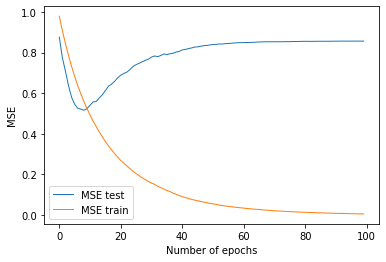

In [7]:
print("Best test MSE at epoch", XGboost_best_model_index)
plt.figure()
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_1']['rmse'], '-', label = 'MSE test', linewidth=1)
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_0']['rmse'], '-', label = 'MSE train', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()   
plt.show()

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


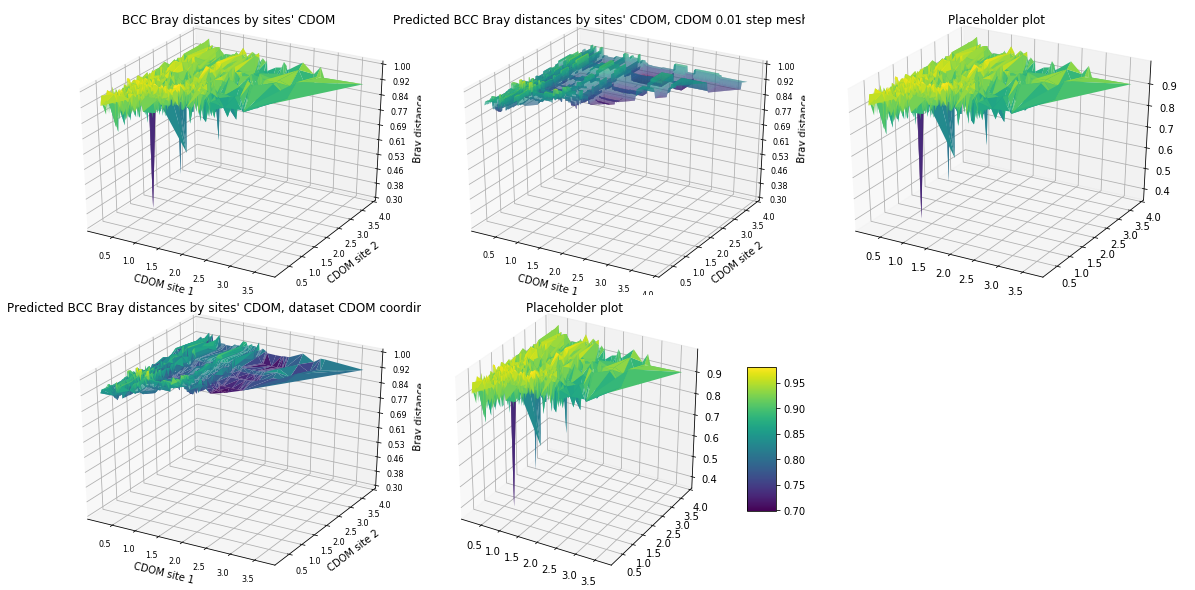

Best test MSE at epoch 99


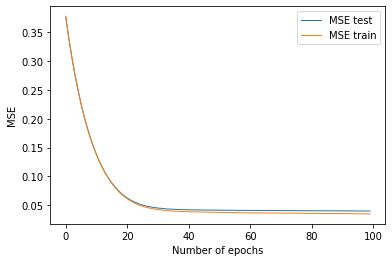

MSE on test data: 0.0015971218987677678
     True values  Predicted values
0       0.932512          0.892210
1       0.949164          0.921812
2       0.958748          0.932300
3       0.955342          0.954732
4       0.848067          0.907075
..           ...               ...
507     0.927239          0.901415
508     0.845258          0.908833
509     0.927460          0.896002
510     0.907755          0.915264
511     0.943969          0.930023

[512 rows x 2 columns] 

MSE on train data: 0.001221589669453819
      True values  Predicted values
0        0.929249          0.920365
1        0.922144          0.918567
2        0.897553          0.873243
3        0.978072          0.951257
4        0.958259          0.957556
...           ...               ...
2039     0.970614          0.919479
2040     0.955536          0.922876
2041     0.951890          0.911863
2042     0.944049          0.919041
2043     0.964175          0.941845

[2044 rows x 2 columns] 



In [8]:
#XGboost with scikitlearn - data with spatial component (BCC Bray distance by CDOM)
X_CDOM = CDOM.loc[:,["CDOM.x1", "CDOM.x2"]] #Molten meshgrid CDOM values for real data BCC Bray distances
X_CDOM_diag_mesh = CDOM_diag_mesh.loc[:,["CDOM.x1", "CDOM.x2"]] #Molten meshgrid CDOM values for generating predicted BCC Bray distances
y_CDOM = CDOM.loc[:,"ASV.dist"]

# Séparation des données en jeux d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_CDOM, y_CDOM, train_size=0.8, #80 % du jeu de données est utilisé pour l'entraînement, 20 % pour test
test_size = 0.2, random_state=1)

# Entraînement du modèle sur le jeu de données d'entraînement
model = XGBRegressor(objective='reg:squarederror')  #Instanciation du modèle
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], #Entraînement du modèle
          eval_metric='rmse', early_stopping_rounds=40, verbose=False)

#Récurpération du meilleur modèle selon l'erreur du carré moyen (MSE)
XGboost_best_model_index = model.best_iteration #Indice de l'itération produisant l'erreur la plus basse sur le jeu de test
XGboost_best_iteration = model.get_booster().best_ntree_limit #Sélection du modèle à cet index de la meilleure itération
MSE_per_epoch = model.evals_result()  #Récupération des vecteurs pour les erreurs de prédiction sur les jeux d'entraînement et test pour chaque itération

# Prédiction de y
y_pred = model.predict(X_test, ntree_limit=XGboost_best_iteration) #Prédiction de y en fonction du jeu de données test X
y_pred_train = model.predict(X_train) #Prédiction de y en fonction du jeu de données d'entraînement X

# Évaluation des prédictions
def TruePredictedTable(T,P):
  table = pd.DataFrame(np.concatenate((T, P), axis=1))
  table.columns = ["True values", "Predicted values"]
  return table

best_prediction = model.predict(X_CDOM, ntree_limit=XGboost_best_iteration)
CDOM_pred = best_prediction.copy()  #CDOM_pred.shape: (2556,) CDOM_pred are the predicted BCC Bray distances for CDOM value pairs
CDOM_pred_fine_mesh = model.predict(X_CDOM_diag_mesh, ntree_limit=XGboost_best_iteration)

# Plot Bray distance by CDOM
x1 = (CDOM_sorted.loc[:,"x"])
x2 = x1.copy()
x1, x2 = np.meshgrid(x1,x2)
CDOM.mesh[x1-x2==0] = np.nan

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.set_title("BCC Bray distances by sites' CDOM", fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0, hspace=0)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")

# Set up the axes for the second plot
ax = fig.add_subplot(2, 3, 2, projection='3d')
ax.set_title("Predicted BCC Bray distances by sites' CDOM, CDOM 0.01 step meshgrid", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)


# Plot the surface.
ax.plot_trisurf(X_CDOM_diag_mesh.loc[:,"CDOM.x1"], X_CDOM_diag_mesh.loc[:,"CDOM.x2"], CDOM_pred_fine_mesh, #197109 datapoints
                        cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")

# Set up the axes for the third plot
ax = fig.add_subplot(2, 3, 3, projection='3d')
ax.set_title('Placeholder plot', fontsize=12)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')

# Set up the axes for the fourth plot
ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.set_title("Predicted BCC Bray distances by sites' CDOM, dataset CDOM coordinates", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM_pred, #197109 datapoints
                        cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")

# Set up the axes for the fifth plot
ax = fig.add_subplot(2, 3, 5, projection='3d')
ax.set_title('Placeholder plot', fontsize=12)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

print("Best test MSE at epoch", XGboost_best_model_index)
plt.figure()
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_1']['rmse'], '-', label = 'MSE test', linewidth=1)
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_0']['rmse'], '-', label = 'MSE train', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()   
plt.show()

MSE_XGboost = mean_squared_error(y_test, y_pred)
MSE_XGboost_train = mean_squared_error(y_train, y_pred_train)
print("MSE on test data:", MSE_XGboost)
print(TruePredictedTable(y_test[:, np.newaxis], y_pred[:, np.newaxis]), "\n")
print("MSE on train data:", MSE_XGboost_train)
print(TruePredictedTable(y_train[:, np.newaxis], y_pred_train[:, np.newaxis]), "\n")


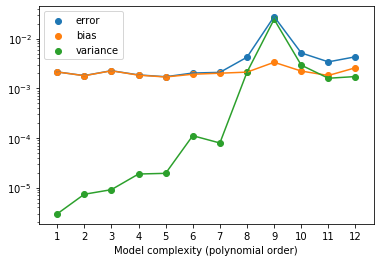

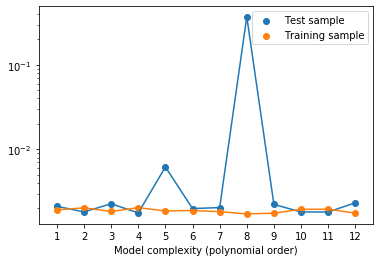

In [9]:
# Use regression on predicted values to get smooth function of BCC Bray distance by CDOM

import pandas as pd
from sklearn.utils import resample

def GenerateMesh(x_min, x_max, y_min, y_max, step_x, step_y, log_transform=False):
  import numpy as np
  if log_transform==False:
    x = np.arange(x_min, x_max + step_x, step_x)  #Add range value to range end value due for last element being excluded from range
    y = np.arange(y_min, y_max + step_y, step_y)  #Add range value to range end value due for last element being excluded from range
  else:
    x = np.log10(np.arange(x_min, x_max + step_x, step_x)) + 1  #log1p transformation
    y = np.log10(np.arange(y_min, y_max + step_y, step_y)) + 1  #log1p transformation
  x, y = np.meshgrid(x,y)
  x = x.ravel()
  y = y.ravel()
  return x, y

def GenerateDesignMatrix(x, y, order):
  X = np.c_[np.ones(len(x))]
  if order==0:
    return X    
  elif order>0:
   X_str = "np.c_[np.ones(len(x)),"
   for i in range(1, order+1, 1):
     str_len = (i+1)*(2*i+1)-1
     poly_string = "x" * str_len
     poly_string_list = list(poly_string)
     for j in range(2*i-1, str_len, (2*(i+1)-1)):
       poly_string_list[j] = ","
     for j in range(2*i, str_len, (2*(i+1)-1)):
       poly_string_list[j] = " "
     for j in range(1, str_len, 2*i+1):
       if i==2:
         poly_string_list[j] = "*"
       elif i>=3:
         poly_string_list[j:(j+2*(i-1)):2] = (i-1)*"*"
     poly_string_list[-2:2*i-1:-(2*i+1)] = i*"y"
     for j in range(0, i, 1):
       poly_string_list[-2*(1+j):2*i-1+j*(2*i+1):-(2*i+1)] = (i-j)*"y"
     poly_string = "".join(poly_string_list)
     X_str = X_str + " " + poly_string
   X = list(X_str)
   X[-1] = "]"
   X = eval("".join(X))
   colnames = list(X_str.replace(",", "").replace("np.c_[np.ones(len(x))", "").split(" "))
  return X, colnames

"""
# Print design matrix formatted as pandas dataframe
DesignMat_out = GenerateDesignMatrix(0.21, 3.83, 0.21, 3.83, 0.01, 0.01, 5) #3.83
DesignMat = pd.DataFrame(DesignMat_out[0])
DesignMat.columns = DesignMat_out[1]
print(DesignMat)
"""

def DesignMatrixList(x, y, order):
  X_degree_list = []
  for i in range(order+1):
    X_degree_list.append(GenerateDesignMatrix(x, y, i)[0])
  return X_degree_list

def SVDinv(A):
  ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
  SVD is numerically more stable than the inversion algorithms provided by
  numpy and scipy.linalg at the cost of being slower.
  '''
  U, s, VT = np.linalg.svd(A)
  D = np.zeros((len(U),len(VT)))
  for i in range(0,len(VT)):
    D[i,i]=s[i]
  UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.pinv(D) #np.linalg.pinv instead of np.linalg.inv
  return np.matmul(V,np.matmul(invD,UT))

def beta_SVD(X, z):
  A = np.transpose(X) @ X
  beta_SVD = SVDinv(A).dot(X.T).dot(z)
  #ztilde_SVD = X @ beta_SVD
  return beta_SVD

def yPredictedSVD(X, z):  #Takes design matrix as X and a column vector of same number of rows as z
  z_pred_SVD = X @ beta_SVD(X, z)
  return z_pred_SVD

def Fig_2_11(design_mat, degree, n_bootstraps):
  x_train, x_test, z_train, z_test = train_test_split(design_mat, z, test_size=0.3)
  z_pred = np.empty((z_test.shape[0], n_bootstraps))
  for i in range(n_bootstraps):
    x_, z_ = resample(x_train, z_train)
    z_pred[:,i] = x_test @ beta_SVD(x_, z_)
  z_test = z_test[:, np.newaxis]
  error = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
  bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
  variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )
  return error,bias,variance

def Fig_2_11_no_resampling(design_mat, degree):  # Using SVD
  x_train, x_test, z_train, z_test = train_test_split(design_mat, z, test_size=0.3)
  z_pred = x_test @ beta_SVD(x_train, z_train)
  z_train_pred = x_train @ beta_SVD(x_train, z_train)
  error = np.mean((z_test - z_pred)**2)
  train_error = np.mean((z_train - z_train_pred)**2 )
  #print("z_pred")
  #print(pd.DataFrame(z_pred))
  #print("z_train_pred")
  #print(pd.DataFrame(z_train_pred))
  return error, train_error

# With resampling
def generate_error_bias_variance_with_resampling(mat_list, starting_degree, bootstrap):
  degree = starting_degree
  degree_list = []
  Fig_2_11_error_list= []
  Fig_2_11_bias_list = []
  Fig_2_11_variance_list = []
  for mat in mat_list:
    #print(pd.DataFrame(mat))
    #print(degree)
    #print("Start", degree, time.clock())
    Fig_2_11_result = Fig_2_11(mat, degree, bootstrap)
    Fig_2_11_error_list.append(Fig_2_11_result[0])
    Fig_2_11_bias_list.append(Fig_2_11_result[1])
    Fig_2_11_variance_list.append(Fig_2_11_result[2])
    degree_list.append(degree)
    degree = degree + 1
    #print(Fig_2_11_result)
    #print("End", time.clock())
  return Fig_2_11_error_list, Fig_2_11_bias_list, Fig_2_11_variance_list, degree_list

# No resampling
def generate_error_bias_variance_without_resampling(mat_list, starting_degree):
  degree = starting_degree
  degree_list = []
  Fig_2_11_error_list= []
  Fig_2_11_train_error_list = []
  for mat in mat_list:
    #print(pd.DataFrame(mat))
    #print(degree)
    #print("Start", degree, time.clock())
    Fig_2_11_result = Fig_2_11_no_resampling(mat, degree)
    Fig_2_11_error_list.append(Fig_2_11_result[0])
    Fig_2_11_train_error_list.append(Fig_2_11_result[1])
    degree_list.append(degree)
    degree = degree + 1
    #print(Fig_2_11_result)
    #print("End", time.clock())
  return Fig_2_11_error_list, Fig_2_11_train_error_list, degree_list

# Plot error, bias and variance as a function of model complexity
def ebv_by_model_complexity(metrics):
  plt.plot(metrics[3], metrics[0])
  plt.plot(metrics[3], metrics[1])
  plt.plot(metrics[3], metrics[2])
  plt.scatter(metrics[3], metrics[0], label='error')
  plt.scatter(metrics[3], metrics[1], label='bias')
  plt.scatter(metrics[3], metrics[2], label='variance')
  plt.xlabel("Model complexity (polynomial order)")
  plt.xticks(np.arange(1, len(metrics[3])+1, 1))
  #plt.yticks(np.arange(0, 0.2, 0.05))
  plt.yscale('log')
  plt.legend()
  plt.show()

# Plot training and sample errors as functions of model complexity
def training_vs_test(metrics):
  plt.plot(metrics[2], metrics[0])
  plt.plot(metrics[2], metrics[1])
  plt.scatter(metrics[2], metrics[0], label='Test sample')
  plt.scatter(metrics[2], metrics[1], label='Training sample')
  plt.xlabel("Model complexity (polynomial order)")
  plt.xticks(np.arange(1, len(metrics[2])+1, 1))
  #plt.yticks(np.arange(0, 0.2, 0.05))
  plt.yscale('log')
  plt.legend()
  plt.show()



"""
A = np.transpose(X) @ X
C = SVDinv(A)
#print("C", "\n", pd.DataFrame(C))
beta_SVD = C.dot(X.T).dot(np.ravel(FrankeFunction(x, y))) # Finding beta for z without noise
ztilde_SVD = X @ beta_SVD()   
"""
X_mesh = GenerateMesh(0.21, 3.83, 0.21, 3.83, 0.01, 0.01, log_transform=True) # The low number of points on the higher end of the gradient causes distortions for linear regression
X_mesh_degree_list = DesignMatrixList(X_mesh[0], X_mesh[1], 12)[1:]
X_degree_list = DesignMatrixList(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], 12)[1:]
X_degree_list_subset = []

z = CDOM_pred #XGboost-predicted values
z = CDOM.loc[:,"ASV.dist"] #Original data
ebv_no_resampling = generate_error_bias_variance_without_resampling(X_degree_list, 1)
ebv_resampling = generate_error_bias_variance_with_resampling(X_degree_list, 1, 100)
ebv_by_model_complexity(ebv_resampling)
training_vs_test(ebv_no_resampling)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


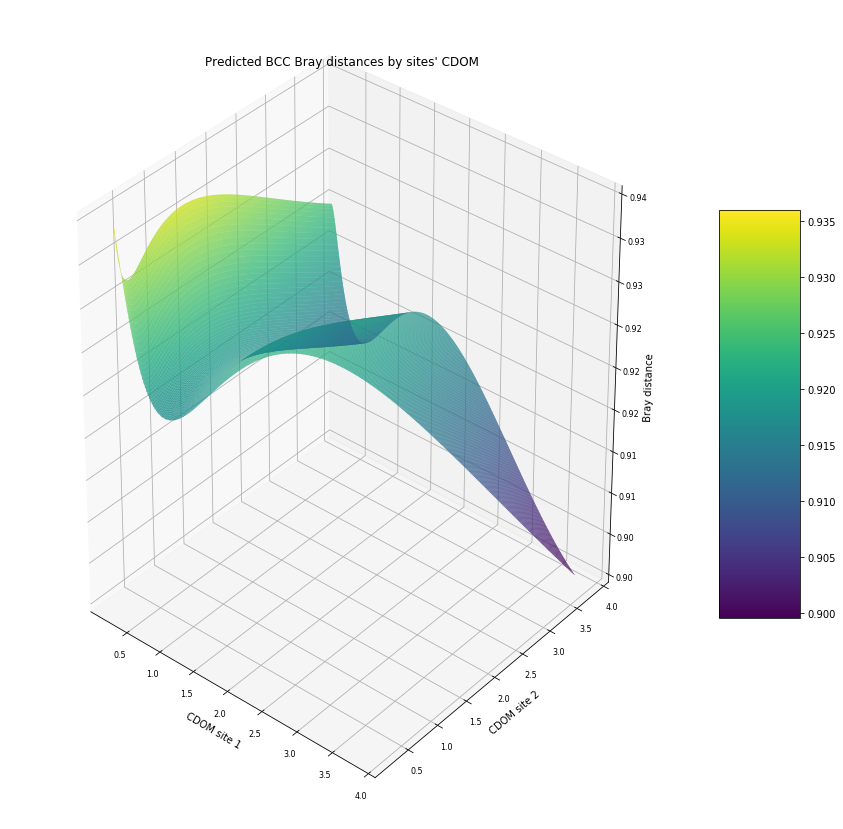

In [10]:
# Plotting
CDOM_pred_reg = X_mesh_degree_list[8] @ beta_SVD(X_degree_list[8], CDOM_pred)
#print(pd.DataFrame(X_mesh_degree_list[1]))
#print(CDOM_pred_reg)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#  print(pd.DataFrame(CDOM_pred_reg))

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

x_mesh_reg = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)
y_mesh_reg = x_mesh_reg.copy()
x_mesh_reg, y_mesh_reg = np.meshgrid(x_mesh_reg,y_mesh_reg)
X_CDOM_mesh = pdCat(x_mesh_reg.ravel()[:, np.newaxis], y_mesh_reg.ravel()[:, np.newaxis])
#print(pd.DataFrame(X_CDOM_mesh))
#print("CDOM_pred_reg.shape", CDOM_pred_reg.shape)
z_CDOM_mesh_pred = np.reshape(CDOM_pred_reg, (x_mesh_reg.shape[0], x_mesh_reg.shape[0]))
z_CDOM_mesh_pred[x_mesh_reg-y_mesh_reg==0] = np.nan
z_CDOM_mesh_pred[x_mesh_reg>y_mesh_reg] = np.nan

# Set up the axes for the second plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=310.0)

# Plot the surface.
#print("x_mesh.shape, y_mesh.shape, CDOM_pred_reg.shape", "\n", X_CDOM_mesh.loc[:,"CDOM.x1"].shape, X_CDOM_mesh.loc[:,"CDOM.x2"].shape, CDOM_pred_reg.shape)
#print("np.nanmin(z_CDOM_mesh_pred), np.nanmax(z_CDOM_mesh_pred)", "\n", np.nanmin(CDOM_pred_reg), np.nanmax(CDOM_pred_reg))
#surf = ax.plot_trisurf(X_CDOM_mesh.loc[:,"CDOM.x1"], X_CDOM_mesh.loc[:,"CDOM.x2"], CDOM_pred_reg,
#                        cmap='viridis', edgecolor='none', vmin=np.nanmin(CDOM_pred_reg), vmax=np.nanmax(CDOM_pred_reg))
#print("x_mesh.shape, y_mesh.shape, CDOM_pred_reg.shape", "\n", x_mesh.shape, y_mesh.shape, z_CDOM_mesh_pred.shape)
#print("np.nanmin(z_CDOM_mesh_pred), np.nanmax(z_CDOM_mesh_pred)", "\n", np.nanmin(z_CDOM_mesh_pred), np.nanmax(z_CDOM_mesh_pred))
surf = ax.plot_surface(x_mesh_reg, y_mesh_reg, z_CDOM_mesh_pred, cmap='viridis',
                       antialiased=True, vmin=np.nanmin(z_CDOM_mesh_pred), vmax=np.nanmax(z_CDOM_mesh_pred),
                       rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(np.nanmin(z_CDOM_mesh_pred), np.nanmax(z_CDOM_mesh_pred))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()




Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed
Epoch 20 completed
[40.368618361577504, 2.7192867026051717, 2.5820657147062653, 2.5476594261010117, 2.5106894686092405, 2.4774376532320446, 2.4495659670072434, 2.4268453802880328, 2.4084993683358302, 2.3936934799403247, 2.3816945584181024, 2.3719047971898, 2.363852301690945, 2.3571697629176374, 2.351572701118296, 2.3468408378755337, 2.3428032021390566, 2.3393265839876407, 2.336306708402442, 2.333661525641335, 2.3313261159728147]
Minimum MSE : 2.3313261159728147 reached at epoch  20


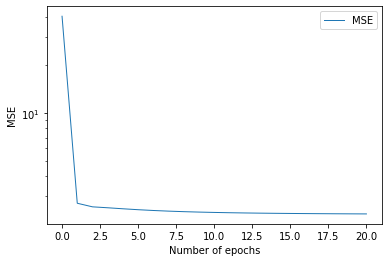

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


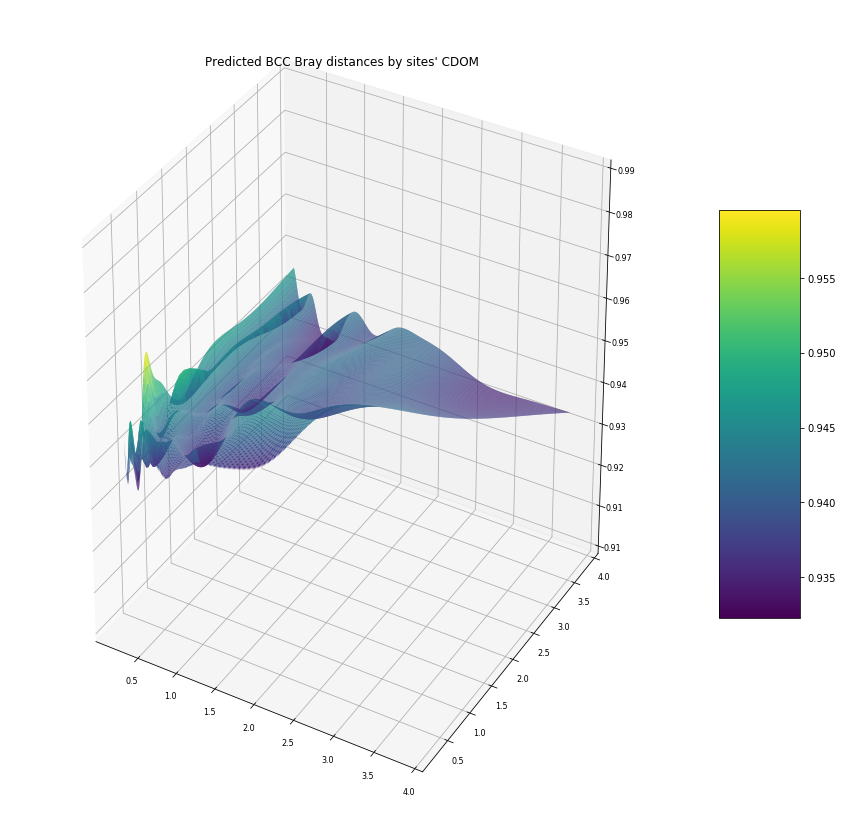

In [13]:
# Neural network with multiple layers - regression - BCC Bray distances by CDOM - predicted data from XGboost
X_CDOM = CDOM.loc[:,["CDOM.x1", "CDOM.x2"]].to_numpy()
y_CDOM = CDOM_pred[:, np.newaxis] #Predicted data from XGboost
#y_CDOM = CDOM.loc[:,"ASV.dist"].to_numpy()[:, np.newaxis] #Original data

NN_reg = NeuralNetworkML(X_CDOM, y_CDOM, trainingShare=0.80, n_hidden_layers=3, n_hidden_neurons=[2000, 1000, 500], n_categories=1,
                     epochs=20, batch_size=10, eta=1e-8, lmbd=0, fixed_LR=False, method="regression", activation="sigmoid")
NN_reg.train()
test_predict = NN_reg.predict(NN_reg.XTest)
#best_prediction = NN_reg.models[NN_reg.accuracy_list.index(min(NN_reg.accuracy_list))]
print(NN_reg.accuracy_list)
print("Minimum MSE :", min(NN_reg.accuracy_list), "reached at epoch ", NN_reg.accuracy_list.index(min(NN_reg.accuracy_list)))

plt.figure()
plt.plot(list(range(0, len(NN_reg.accuracy_list), 1)), NN_reg.accuracy_list, '-', label = 'MSE', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()
plt.yscale('log') 
plt.show()

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

#Use log-transformed CDOM values for creating design matrix, then plot on original values
x_mesh = np.log10(np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)) + 1
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)
X_CDOM_mesh = pdCat(x_mesh.ravel()[:, np.newaxis], y_mesh.ravel()[:, np.newaxis]).to_numpy()
best_prediction = NN_reg.model_prediction(X_CDOM_mesh, NN_reg.accuracy_list.index(min(NN_reg.accuracy_list)))

x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)

ff_pred = best_prediction.copy()
ff_pred = np.reshape(ff_pred, (363, 363))
ff_pred[x_mesh-y_mesh==0] = np.nan
ff_pred[x_mesh>y_mesh] = np.nan
#print(pd.DataFrame(ff_pred))

# Plot the NN-smoothed surface
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_surface(x_mesh, y_mesh, ff_pred, cmap='viridis',
                       antialiased=True, vmin=np.nanmin(ff_pred), vmax=np.nanmax(ff_pred),
                       rstride=1, cstride=1)
# Customize the z axis.
z_range =  (np.nanmax(ff_pred) - np.nanmin(ff_pred))
ax.set_zlim(np.nanmin(ff_pred) - z_range, np.nanmax(ff_pred) + z_range)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.tick_params(labelsize=8)
plt.show()

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
[105.04429127715113, 3.1442334041405484, 2.8597854520515176, 2.7380851805202786, 2.6503786063966963, 2.584351182847951, 2.5341927809483566, 2.4957468320488396, 2.4659800273027175, 2.4426892636909847, 2.4242737406554045]
Minimum MSE : 2.4242737406554045 reached at epoch  10


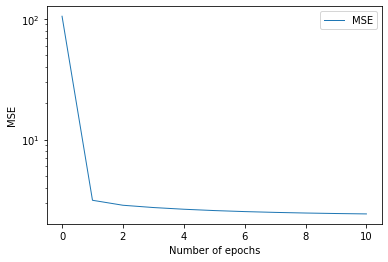

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


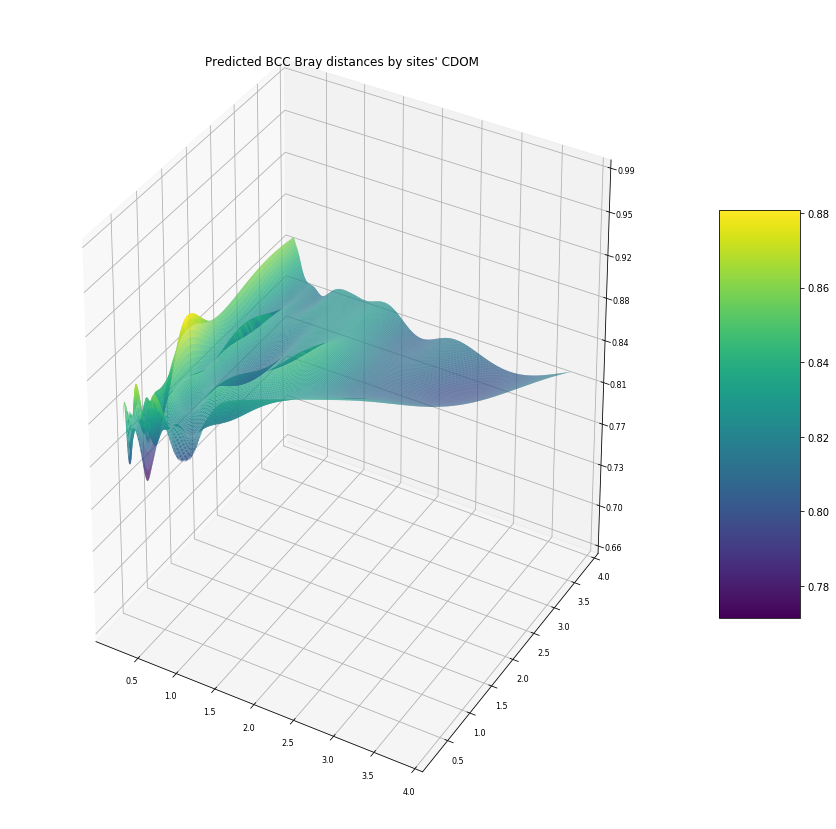

In [22]:
# Neural network with multiple layers - regression - BCC Bray distances by CDOM - original data
X_CDOM = CDOM.loc[:,["CDOM.x1", "CDOM.x2"]].to_numpy()
y_CDOM = CDOM.loc[:,"ASV.dist"].to_numpy()[:, np.newaxis] #Original data

NN_reg_original = NeuralNetworkML(X_CDOM, y_CDOM, trainingShare=0.80, n_hidden_layers=3, n_hidden_neurons=[2000, 1000, 500], n_categories=1,
                     epochs=10, batch_size=10, eta=1e-8, lmbd=0, fixed_LR=False, method="regression", activation="sigmoid")
NN_reg_original.train()
test_predict = NN_reg_original.predict(NN_reg_original.XTest)
#best_prediction = NN_reg_original.models[NN_reg_original.accuracy_list.index(min(NN_reg_original.accuracy_list))]
print(NN_reg_original.accuracy_list)
print("Minimum MSE :", min(NN_reg_original.accuracy_list), "reached at epoch ", NN_reg_original.accuracy_list.index(min(NN_reg_original.accuracy_list)))

plt.figure()
plt.plot(list(range(0, len(NN_reg_original.accuracy_list), 1)), NN_reg_original.accuracy_list, '-', label = 'MSE', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()
plt.yscale('log')   
plt.show()

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

#Use log-transformed CDOM values for creating design matrix, then plot on original values
x_mesh = np.log10(np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)) + 1
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)
X_CDOM_mesh = pdCat(x_mesh.ravel()[:, np.newaxis], y_mesh.ravel()[:, np.newaxis]).to_numpy()
best_prediction = NN_reg_original.model_prediction(X_CDOM_mesh, NN_reg_original.accuracy_list.index(min(NN_reg_original.accuracy_list)))

x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)

ff_pred_original = best_prediction.copy()
ff_pred_original = np.reshape(ff_pred_original, (363, 363))
ff_pred_original[x_mesh-y_mesh==0] = np.nan
ff_pred_original[x_mesh>y_mesh] = np.nan
#print(pd.DataFrame(ff_pred_original))

# Plot the NN-smoothed surface
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_surface(x_mesh, y_mesh, ff_pred_original, cmap='viridis',
                       antialiased=True, vmin=np.nanmin(ff_pred_original), vmax=np.nanmax(ff_pred_original),
                       rstride=1, cstride=1)
# Customize the z axis.
z_range =  (np.nanmax(ff_pred_original) - np.nanmin(ff_pred_original))
ax.set_zlim(np.nanmin(ff_pred_original) - z_range, np.nanmax(ff_pred_original) + z_range)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.tick_params(labelsize=8)
plt.show()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term
Training keras model on dataset








/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/1





2556/2556 [==============================] - 7s 3ms/step - loss: 0.0339
Predicting CDOM values for 0.01 step meshgrid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


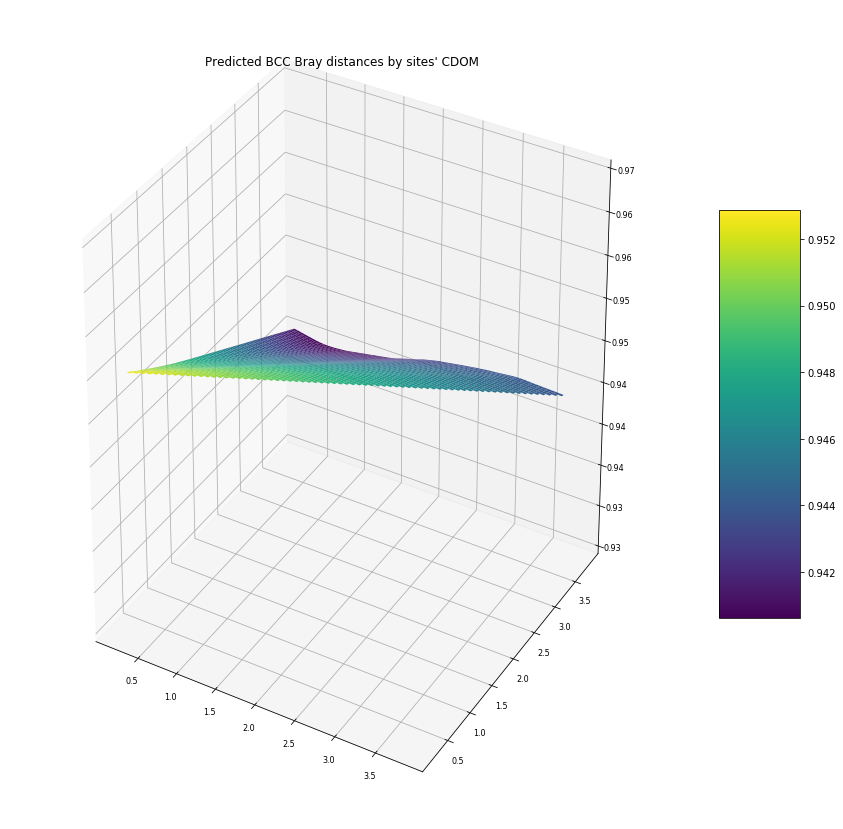

In [0]:
# Keras neural network - BCC Bray distances by CDOM - original data
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# split into input (X) and output (y) variables
X_CDOM = CDOM.loc[:,["CDOM.x1", "CDOM.x2"]].to_numpy()
y_CDOM = CDOM.loc[:,"ASV.dist"].to_numpy()[:, np.newaxis]

# compile the keras model
def baseline_model(X, act, eta):
	#Create model
	model = Sequential()
	model.add(Dense(2000, input_dim=X.shape[1], kernel_initializer='glorot_normal', activation=act))	#Input layer
	model.add(Dense(1000, kernel_initializer='glorot_normal', activation='sigmoid'))	#'glorot_normal' is Xavier initialization of weights
	model.add(Dense(500, kernel_initializer='glorot_normal', activation='sigmoid'))
	model.add(Dense(1, kernel_initializer='glorot_normal', activation='linear'))	#Output layer

	#Optimizer
	sgd = optimizers.SGD(lr=eta, decay=1e-6, momentum=0.9, nesterov=True)	#Learning rate should be 1e-9 to match own NN code
	#Compile model
	model.compile(loss='mean_squared_error', optimizer=sgd)
	return model

"""
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X_CDOM, y_CDOM, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
"""

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

# Fit the keras model on the dataset
print("Training keras model on dataset")
model = baseline_model(X_CDOM, 'relu', 1e-4)
model.fit(X_CDOM, y_CDOM, nb_epoch=1, batch_size=10, verbose=1, shuffle=False)

# Predict CDOM values for 0.01 step meshgrid
#x_mesh = np.log10(np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)) + 1
x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.05)
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)
X_CDOM_mesh = pdCat(x_mesh.ravel()[:, np.newaxis], y_mesh.ravel()[:, np.newaxis]).to_numpy()

print("Predicting CDOM values for 0.01 step meshgrid")
predictions = model.predict(X_CDOM_mesh)
keras_pred_original = predictions.copy()
#keras_pred_original = np.reshape(keras_pred_original, (363, 363))
keras_pred_original = np.reshape(keras_pred_original, (73, 73))
keras_pred_original[x_mesh-y_mesh==0] = np.nan
keras_pred_original[x_mesh>y_mesh] = np.nan
#print(pd.DataFrame(keras_pred_original))

# Plot the NN-smoothed surface
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_surface(x_mesh, y_mesh, keras_pred_original, cmap='viridis',
                       antialiased=True, vmin=np.nanmin(keras_pred_original), vmax=np.nanmax(keras_pred_original),
                       rstride=1, cstride=1)
# Customize the z axis.
z_range =  (np.nanmax(keras_pred_original) - np.nanmin(keras_pred_original))
ax.set_zlim(np.nanmin(keras_pred_original) - z_range, np.nanmax(keras_pred_original) + z_range)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.tick_params(labelsize=8)
plt.show()

Iteration 1, loss = 0.01694673
Iteration 2, loss = 0.00615167


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MSE on test data: 0.0023358870635152894
MSE on train data: 0.0021452386653127054
Predicting CDOM values for 0.01 step meshgrid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


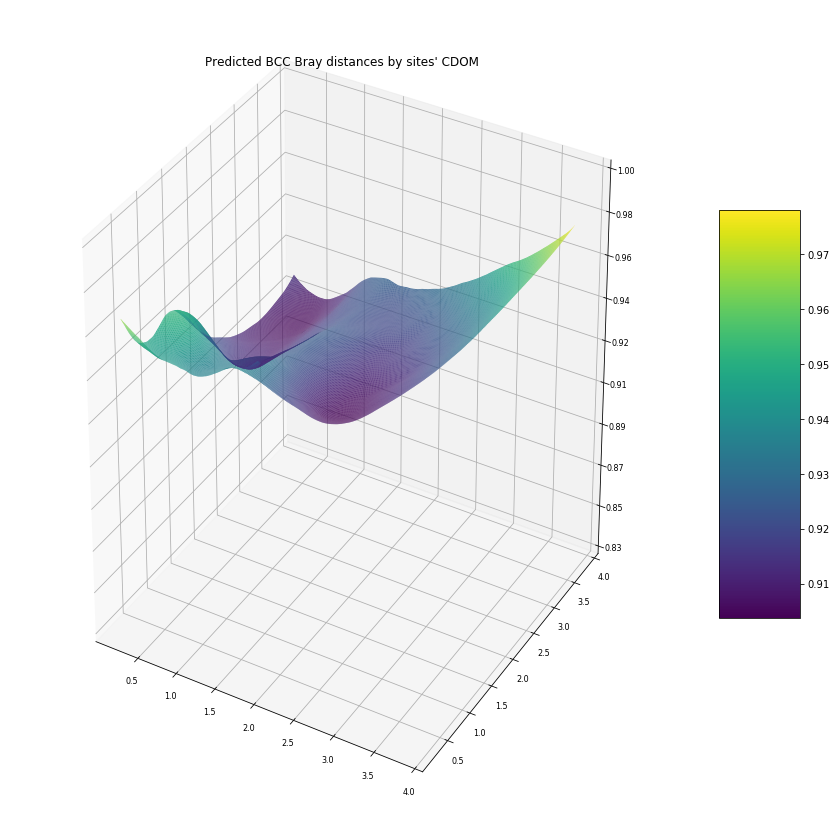

In [0]:
# Scikit-learn neural network - BCC Bray distances by CDOM - original data
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Define data
X_CDOM = CDOM.loc[:,["CDOM.x1", "CDOM.x2"]].to_numpy()
y_CDOM = CDOM.loc[:,"ASV.dist"].to_numpy()[:, np.newaxis]
X_train, X_test, y_train, y_test  = train_test_split(X_CDOM, y_CDOM, train_size=0.8, \
test_size = 0.2, random_state=1)
"""
def ArrayToDf(table):
  df = pd.DataFrame(table)
  df.columns = ["CDOM.x1", "CDOM.x2"]
  return df.to_numpy()

X_train = ArrayToDf(X_train)
X_test = ArrayToDf(X_test)
print("X_train", X_train)
"""
#X_train.columns, X_test.columns, y_train.columns, y_test.columns = ["CDOM.x1", "CDOM.x2"]

sk_nn_original = MLPRegressor(hidden_layer_sizes=(3200, 1600), #hidden_layer_sizes=(338, 338, 50)
                  activation='relu', solver='adam', max_iter = 100, random_state = 56,
                  learning_rate='constant', learning_rate_init=1e-4, 
                  batch_size=10,
                  verbose = True)
sk_nn_original.fit(X_train, y_train.ravel())
y_pred = sk_nn_original.predict(X_test)
y_pred_train = sk_nn_original.predict(X_train)

# evaluate predictions
def TruePredictedTable(T,P):
  table = pd.DataFrame(np.concatenate((T, P), axis=1))
  table.columns = ["True values", "Predicted values"]
  return table

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

MSE_sk_NN = mean_squared_error(y_test, y_pred)
MSE_sk_NN_train = mean_squared_error(y_train, y_pred_train)
print("MSE on test data:", MSE_sk_NN)
#print(TruePredictedTable(y_test, y_pred[:, np.newaxis]))
print("MSE on train data:", MSE_sk_NN_train)
#print(TruePredictedTable(y_train, y_pred_train[:, np.newaxis]))

"""
print("Best test MSE at epoch", sk_NN_best_model_index)
plt.figure()
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_1']['rmse'], '-', label = 'MSE test', linewidth=1)
plt.plot(list(range(0, len(MSE_per_epoch['validation_0']['rmse']), 1)), MSE_per_epoch['validation_0']['rmse'], '-', label = 'MSE train', linewidth=1)
plt.ylabel("MSE")
plt.xlabel("Number of epochs")
plt.grid(False)
plt.legend(fontsize="medium") 
plt.legend()   
plt.show()
"""

x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x2"]) + 0.01, 0.01)
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)
X_CDOM_mesh = pdCat(x_mesh.ravel()[:, np.newaxis], y_mesh.ravel()[:, np.newaxis]).to_numpy()

print("Predicting CDOM values for 0.01 step meshgrid")
predictions = sk_nn_original.predict(X_CDOM_mesh)
sk_NN_pred_original = predictions.copy()
sk_NN_pred_original = np.reshape(sk_NN_pred_original, (363, 363))
sk_NN_pred_original[x_mesh-y_mesh==0] = np.nan
sk_NN_pred_original[x_mesh>y_mesh] = np.nan
#print(pd.DataFrame(sk_NN_pred_original))

# Plot the NN-smoothed surface
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_surface(x_mesh, y_mesh, sk_NN_pred_original, cmap='viridis',
                       antialiased=True, vmin=np.nanmin(sk_NN_pred_original), vmax=np.nanmax(sk_NN_pred_original),
                       rstride=1, cstride=1)
# Customize the z axis.
z_range =  (np.nanmax(sk_NN_pred_original) - np.nanmin(sk_NN_pred_original))
ax.set_zlim(np.nanmin(sk_NN_pred_original) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.tick_params(labelsize=8)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


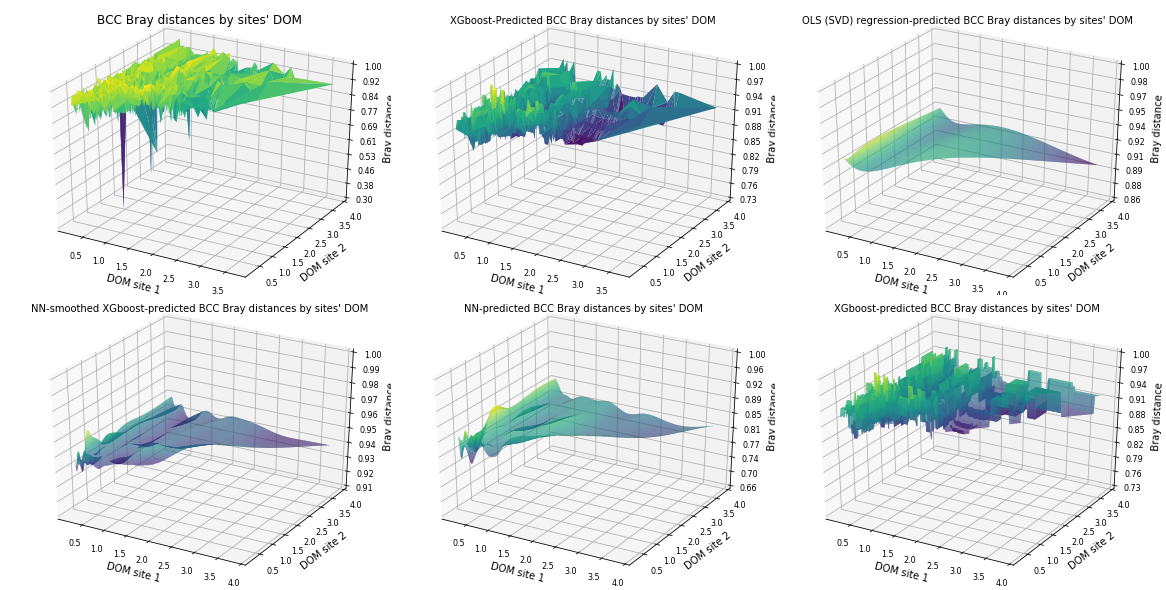

In [24]:
#Compare raw data to XGboost, neural network predicted data and XGboost predicted data smoothed with neural network
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(2, 3, 1, projection='3d')
ax.set_title("BCC Bray distances by sites' DOM", fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=2, top=2, wspace=0, hspace=0)
ax.view_init(elev=30.0, azim=300.0)
surf = ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM.loc[:,"ASV.dist"], 
                        cmap='viridis', edgecolor='none')
# Customize the z axis.
ax.set_zlim(0.3, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

# Set up the axes for the second plot
ax = fig.add_subplot(2, 3, 2, projection='3d')
#ax.set_title("XGboost-Predicted BCC Bray distances by sites' CDOM, dataset CDOM coordinates", fontsize=8)
ax.set_title("XGboost-Predicted BCC Bray distances by sites' DOM", fontsize=10)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(CDOM.loc[:,"CDOM.x1"], CDOM.loc[:,"CDOM.x2"], CDOM_pred, #197109 datapoints
                        cmap='viridis', edgecolor='none')

# Customize the z axis.
z_range =  (np.nanmax(CDOM_pred) - np.nanmin(CDOM_pred))
ax.set_zlim(np.nanmin(CDOM_pred) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

# Set up the axes for the third plot
ax = fig.add_subplot(2, 3, 3, projection='3d')
#ax.set_title("OLS (SVD) regression-predicted BCC Bray distances by sites' CDOM, CDOM 0.01 step meshgrid", fontsize=6)
ax.set_title("OLS (SVD) regression-predicted BCC Bray distances by sites' DOM", fontsize=10)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(x_mesh_reg.ravel(), y_mesh_reg.ravel(), z_CDOM_mesh_pred.ravel(), cmap='viridis', #197109 datapoints
                vmin=np.nanmin(z_CDOM_mesh_pred), vmax=np.nanmax(z_CDOM_mesh_pred),
                edgecolor='none')

# Customize the z axis.
z_range =  (np.nanmax(z_CDOM_mesh_pred) - np.nanmin(z_CDOM_mesh_pred))
ax.set_zlim(np.nanmin(z_CDOM_mesh_pred) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

# Set up the axes for the fourth plot
ax = fig.add_subplot(2, 3, 4, projection='3d')
#ax.set_title("NN-smoothed XGboost-predicted BCC Bray distances by sites' CDOM, CDOM 0.01 step meshgrid", fontsize=6)
ax.set_title("NN-smoothed XGboost-predicted BCC Bray distances by sites' DOM", fontsize=10)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(x_mesh.ravel(), y_mesh.ravel(), ff_pred.ravel(), #197109 datapoints
                cmap='viridis', edgecolor='none',
                vmin=np.nanmin(ff_pred), vmax=np.nanmax(ff_pred))

# Customize the z axis.
z_range =  (np.nanmax(ff_pred) - np.nanmin(ff_pred))
ax.set_zlim(np.nanmin(ff_pred) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

# Set up the axes for the fifth plot
ax = fig.add_subplot(2, 3, 5, projection='3d')
#ax.set_title("NN-predicted BCC Bray distances by sites' CDOM, CDOM 0.01 step meshgrid", fontsize=8)
ax.set_title("NN-predicted BCC Bray distances by sites' DOM", fontsize=10)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
ax.plot_trisurf(x_mesh.ravel(), y_mesh.ravel(), ff_pred_original.ravel(), #197109 datapoints
                cmap='viridis', edgecolor='none',
                vmin=np.nanmin(ff_pred_original), vmax=np.nanmax(ff_pred_original))

# Customize the z axis.
z_range =  (np.nanmax(ff_pred_original) - np.nanmin(ff_pred_original))
ax.set_zlim(np.nanmin(ff_pred_original) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

# Set up the axes for the sixth plot
ax = fig.add_subplot(2, 3, 6, projection='3d')
#ax.set_title("XGboost-predicted BCC Bray distances by sites' CDOM, CDOM 0.01 step meshgrid", fontsize=8)
ax.set_title("XGboost-predicted BCC Bray distances by sites' DOM", fontsize=10)
ax.view_init(elev=30.0, azim=300.0)


# Plot the surface.
ax.plot_trisurf(X_CDOM_diag_mesh.loc[:,"CDOM.x1"], X_CDOM_diag_mesh.loc[:,"CDOM.x2"], CDOM_pred_fine_mesh, #197109 datapoints
                        cmap='viridis', edgecolor='none')

# Customize the z axis.
z_range =  (np.nanmax(CDOM_pred_fine_mesh) - np.nanmin(CDOM_pred_fine_mesh))
ax.set_zlim(np.nanmin(CDOM_pred_fine_mesh) - z_range, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="DOM site 2")
ax.set_xlabel(xlabel="DOM site 1")

plt.show()

In [0]:
# Plot BCC Bray distance by CDOM with surface

def pdCat(x1,x2):
  table = pd.DataFrame(np.concatenate((x1, x2), axis=1))
  table.columns = ["CDOM.x1", "CDOM.x2"]
  return table

x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x1"]), 0.01)
x_mesh = np.arange(min(CDOM.loc[:,"CDOM.x1"]), max(CDOM.loc[:,"CDOM.x1"]), 0.01)
y_mesh = x_mesh.copy()
x_mesh, y_mesh = np.meshgrid(x_mesh,y_mesh)
X_CDOM_mesh = pdCat(x_mesh.ravel()[:, np.newaxis], y_mesh.ravel()[:, np.newaxis])
z_CDOM_mesh_pred = np.reshape(model.predict(X_CDOM_mesh, ntree_limit=XGboost_best_iteration), (x_mesh.shape[0], x_mesh.shape[0]))
z_CDOM_mesh_pred[x_mesh-y_mesh==0] = np.nan
z_CDOM_mesh_pred[x_mesh>y_mesh] = np.nan

# Set up the axes for the second plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection="3d")
ax.set_title("Predicted BCC Bray distances by sites' CDOM", fontsize=12)
ax.view_init(elev=30.0, azim=300.0)

# Plot the surface.
surf = ax.plot_trisurf(X_CDOM_diag_mesh.loc[:,"CDOM.x1"], X_CDOM_diag_mesh.loc[:,"CDOM.x2"], CDOM_pred_fine_mesh, #197109 datapoints
                        cmap='viridis', edgecolor='none')
#surf = ax.plot_surface(x_mesh, y_mesh, z_CDOM_mesh_pred,
#                       antialiased=True, vmin=0.8, vmax=1, rstride=1, cstride=1)

# Customize the z axis.
ax.set_zlim(0.8, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.tick_params(labelsize=8)
ax.set_zlabel(zlabel="Bray distance")
ax.set_ylabel(ylabel="CDOM site 2")
ax.set_xlabel(xlabel="CDOM site 1")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



TypeError: ignored